# Fair Classification on Adult Dataset

In [1]:
import copy
import pytest
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from fomo import FomoClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, average_precision_score
from pmlb import pmlb   
import fomo.metrics as metrics
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.util.ref_dirs import get_reference_directions
dataset = pmlb.fetch_data('adult')
# dataset = dataset.sample(n=2000)
X = dataset.drop('target',axis=1)
y = dataset['target']
Xtrain,Xtest, ytrain,ytest = train_test_split(X,y,
                                            stratify=y, 
                                            random_state=42,
                                            test_size=0.5
                                           )
ss = StandardScaler()
Xtrain = pd.DataFrame(ss.fit_transform(Xtrain), columns=Xtrain.columns, index=ytrain.index)
Xtest = pd.DataFrame(ss.transform(Xtest), columns=Xtest.columns, index=ytest.index)
groups = ['race','sex']

In [2]:
from sklearn.metrics import make_scorer, accuracy_score
from fomo.problem import MLPProblem 
est = FomoClassifier(
    estimator = LogisticRegression(),
    accuracy_metrics=[make_scorer(metrics.FPR)],
    fairness_metrics=[metrics.subgroup_FNR_scorer], 
    verbose=True,
    problem_type=MLPProblem
)

est.fit(Xtrain,ytrain,protected_features=groups, termination=('n_gen',100))


running 8 processes
groups ['race', 'sex']
number of variables: 41
number of objectives: 2
n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |      9 |             - |             -
     2 |      200 |     12 |  0.0086206897 |         nadir
     3 |      300 |     16 |  0.0430379747 |         ideal
     4 |      400 |     17 |  0.0100250627 |         ideal
     5 |      500 |     19 |  0.0252685288 |             f
     6 |      600 |     23 |  0.0148486699 |             f
     7 |      700 |     26 |  0.0362318841 |         ideal
     8 |      800 |     31 |  0.0742437499 |         ideal
     9 |      900 |     27 |  0.0029670378 |         ideal
    10 |     1000 |     28 |  0.0083725444 |         nadir
    11 |     1100 |     29 |  0.0054596395 |             f
    12 |     1200 |     27 |  0.0115790712 |             f
    13 |     1300 |     12 |  0.0061137237 |         ideal
    14 |     1400 |     12 |  0.0256059324 |         ideal
    15 |     1500 |     

FomoClassifier(accuracy_metrics=[make_scorer(FPR)],
               estimator=LogisticRegression(n_jobs=1),
               fairness_metrics=[<function subgroup_FNR_scorer at 0x7fac27cc1440>],
               problem_type=<class 'fomo.problem.MLPProblem'>, verbose=True)

# visualize model set

`est.plot()` will return the Pareto front found during the run, with a red dot indicating the final chosen model. 
By default, Fomo uses the PseudoWeights method from pymoo to choose the final model, which produces a model near the centroid of the front. 

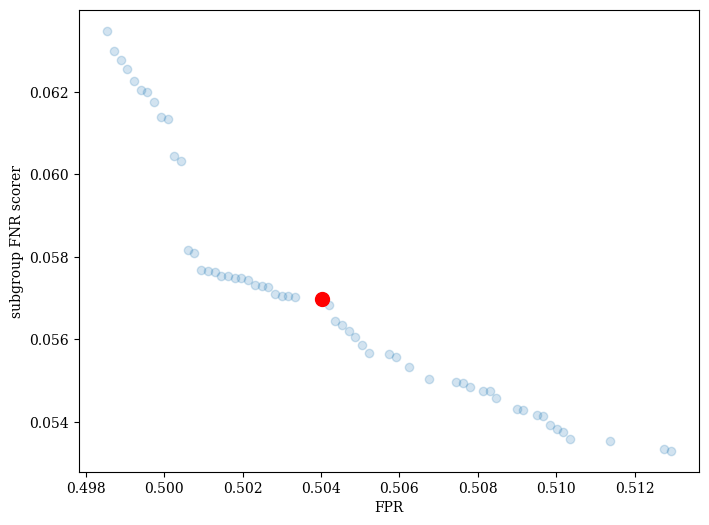

In [3]:
est.plot().show()

## picking with different strategies

We can also pick with other multi-criteria decision making strategies (MDCMs). 
Fomo supports the PseudoWeights, Compromise, and HighTradeoffPoints strategies from [pymoo](https://pymoo.org/mcdm). 

Here's an example of picking with the Compromise strategy.

Text(0.5, 1.0, 'Picking with PseudoWeights')

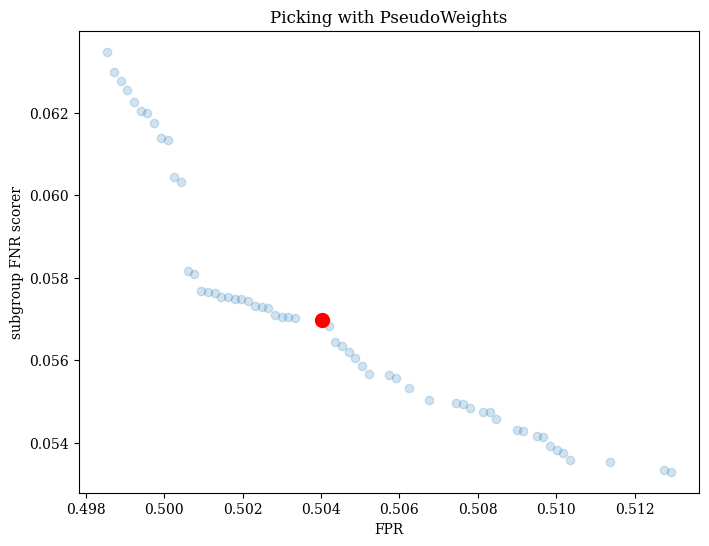

In [4]:
est.best_estimator_ = est.pick_best('PseudoWeights')
plot = est.plot()
plot.show()
plt.title('Picking with PseudoWeights')


Text(0.5, 1.0, 'Picking with Compromise')

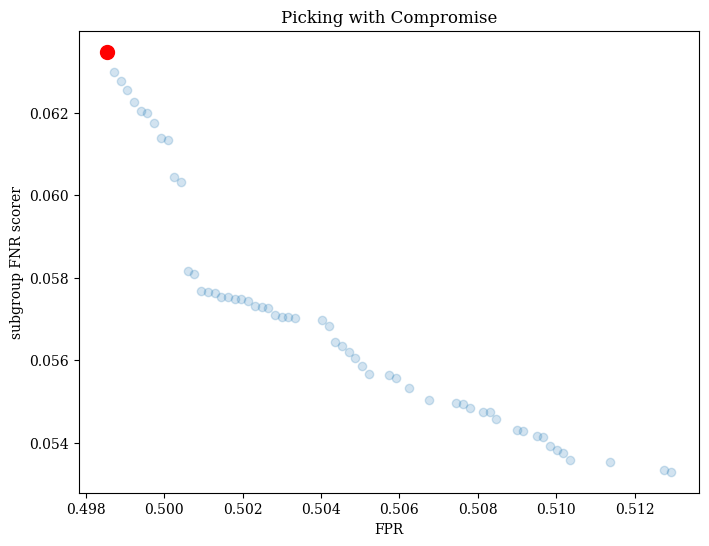

In [5]:
est.best_estimator_ = est.pick_best('Compromise')
plot2 = est.plot()
plot2.show()
plt.title('Picking with Compromise')


Here's an example of picking with the HighTradeoffPoints strategy.

Text(0.5, 1.0, 'Picking with HighTradeoffPoints')

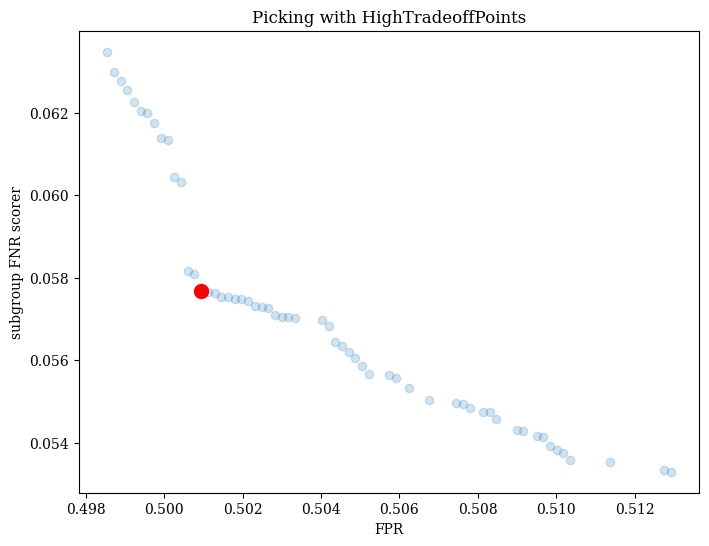

In [6]:
est.best_estimator_ = est.pick_best('HighTradeoffPoints')
plot3 = est.plot()
plot3.show()
plt.title('Picking with HighTradeoffPoints')